In [15]:
import sys

sys.path.append("../")
from scipy.constants import eV, e, hbar, m_e, epsilon_0
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import cg
from scipy.linalg import eigh
from scipy.integrate import simps
import importlib
import src.fem_radial

importlib.reload(src.fem_radial)
import matplotlib.pyplot as plt
from src.fem_radial import *

In [16]:
xs = np.linspace(0, 1, 500)
xs = np.exp(1.1 * xs) - 1
xs /= xs[-1] * 1e9
fem = FemRadial(xs)

In [17]:
K = fem.get_K()
V = fem.get_V()
M = fem.get_M()

In [18]:
val, vec = eigsh((K + V)[:-2, :-2], 3, M[:-2, :-2], which="LA", sigma=-1e-10)
# val, vec = eigsh((K + V)[:-1, :-1], 1, M[:-1, :-1], which="SA")
vec = vec

In [19]:
integral_vec = [simps(v**2, xs[:-1]) for v in vec.T]
vec /= np.sqrt(integral_vec)

/tmp/ipykernel_951283/993141860.py:1: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_vec = [simps(v**2, xs[:-1]) for v in vec.T]


Text(0, 0.5, 'Wavefunction')

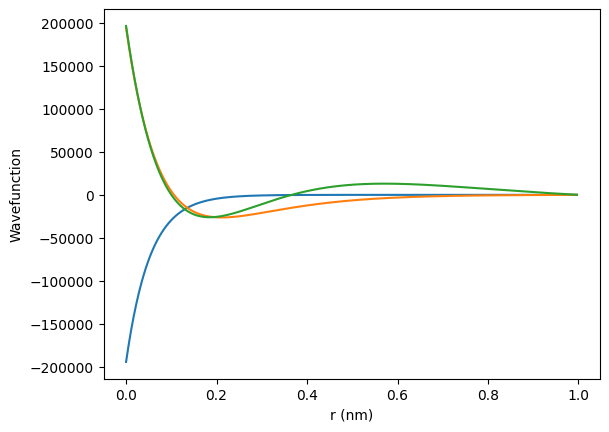

In [20]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, vec)
ax.set_xlabel("r (nm)")
ax.set_ylabel("Wavefunction")

In [21]:
n = vec[:, 0] ** 2
V_poisson = fem.get_V_poisson()
source_poisson = -(e**2) / epsilon_0 * n * xs[:-1] ** 2

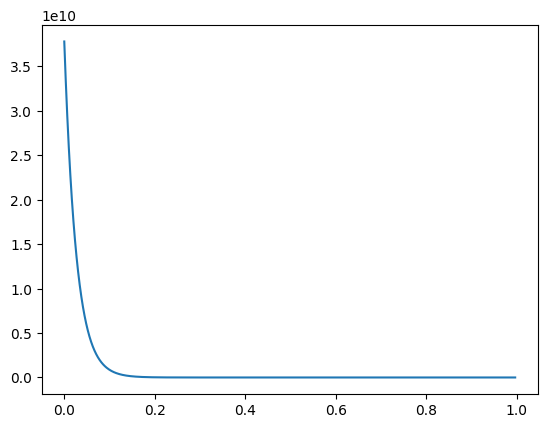

In [22]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, n)

In [23]:
source_poisson.shape

(499,)

In [24]:
V, info = cg(V_poisson[:-2, :-2], source_poisson)

In [25]:
info

0

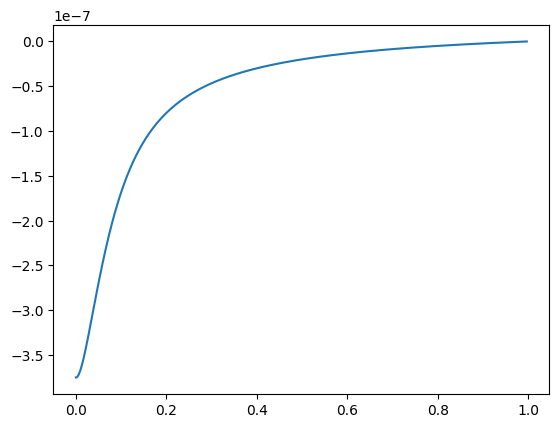

In [27]:
fig, ax = plt.subplots()
ax.plot(xs[:-1] / 1e-9, V / eV)

In [28]:
e**2 / (4 * np.pi * epsilon_0) / 1e-10 / eV

14.399645478425667